<a href="https://colab.research.google.com/github/Oluwatobi09/python-class/blob/master/Hamoye_Stage_B_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [ ]:
#rename columns
column_names = {'T1' : 'Temperature_in_kitchen_area_in_Celsius',
'RH_1' : 'Humidity_in_kitchen_area_in_%',
'T2' : 'Temperature_in_living_room_area_in_Celsius',
'RH_2' :  'Humidity_in_living_room_area_in_%',
'T3' : 'Temperature_in_laundry_room_area',
'RH_3' : 'Humidity_in_laundry_room_area_in_%',
'T4' : 'Temperature_in_office_room_in_Celsius',
'RH_4' : 'Humidity_in_office_room_in_%',
'T5' : 'Temperature_in_bathroom_in_Celsius',
'RH_5' : 'Humidity_in_bathroom_in_%',
'T6' : 'Temperature_outside_the_building_(north_side)_in_Celsius',
'RH_6' : 'Humidity_outside_the_building_(north_side)_in_%',
'T7' : 'Temperature_in_ironing_room_in_Celsius',
'RH_7' : 'Humidity_in_ironing_room_in_%',
'T8' : 'Temperature_in_teenager_room_2_in_Celsius',
'RH_8' : 'Humidity_in_teenager_room_2_in_%',
'T9' : 'Temperature_in_parents_room_in_Celsius',
'RH_9' : 'Humidity_in_parents_room,_in_%',
'T_out' : 'Temperature_outside_(from_Chievres_weather_station)_in_Celsius',
'Press_mm_hg' : 'Pressure_(from_Chievres_weather_station)_in_mm_Hg',
'RH_out' : 'Humidity_outside_(from_Chievres_weather_station)_in_%',
'Windspeed' : 'Wind_speed_(from_Chievres_weather_station)_in_m/s',
'Visibility': 'Visibility_(from_Chievres_weather_station)_in_km',
'Tdewpoint' : 'Tdewpoint_(from_Chievres_weather_station)_Â_°C',
'rv1' : 'Random_variable_1_nondimensional',
'rv2': 'Random_variable_2_nondimensional'
}


df_correct_names = df.rename(columns=column_names)
df_correct_names

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
simple_linear_reg_df = df[['Appliances', 'RH_3']].sample(150, random_state=4)
simple_linear_reg_df

,Appliances,RH_3
10619,40,38.163333
979,50,40.700000
15444,70,34.700000
7178,70,35.790000
8520,130,37.863333
...,...,...
7132,50,36.000000
13190,80,39.433333
9542,60,35.290000
1569,20,39.290000


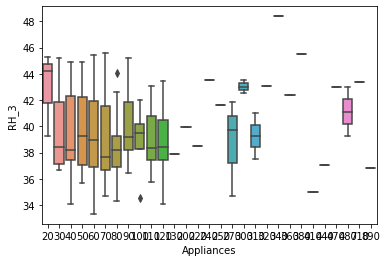

In [ ]:
sns.boxplot(x="Appliances", y="RH_3",
            data=simple_linear_reg_df)

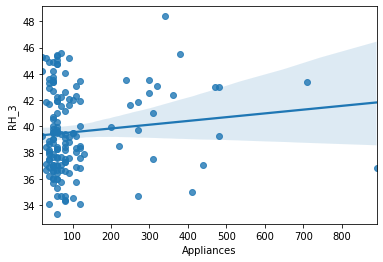

In [ ]:
sns.regplot(x="Appliances", y="RH_3",
            data=simple_linear_reg_df)

In [ ]:
# lets visualize the histogram of all the features to understand the  distribution
# df_correct.hist(bins=20, figsize=(20,20));

Filling Any Missing Values

In [ ]:
df.isnull().sum()

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imputer = imputer.fit(normalised_df.iloc[ : , 12:26])
# normalised_df.iloc[ : , 12:26] = imputer.transform(normalised_df.iloc[ : , 12:26])

In [ ]:
# normalised_df.iloc[ : , 12:26]

In [ ]:
normalised_df.isnull().sum()

Feature and Target Selection

In [ ]:
pre_features_df = df.drop(columns=['date', 'lights'])
pre_features_df

In [ ]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(pre_features_df), columns=pre_features_df.columns, )
normalised_df

In [ ]:
features_df = normalised_df.drop(columns=['Appliances'])
features_df

In [ ]:
target_Variable = normalised_df['Appliances']

In [ ]:
target_Variable


Spliiting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target_Variable, test_size=0.3, random_state=42)

fitting the model

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
predicted_values

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [ ]:
# X = np.reshape(predicted_values,(1, predicted_values.size))
# X
# result = linear_model.score(y_test, X)
# print("Accuracy: %.3f%%" % (result*100.0))

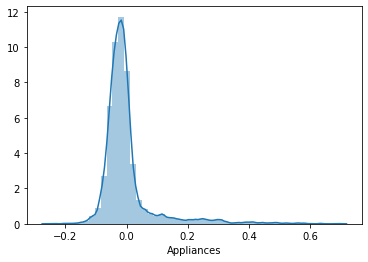

In [ ]:
sns.distplot(y_test - predicted_values)

Checking the Errors

Mean Absolute Error

In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.05

Root Mean Square Error

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 	

0.088

R-Squared

In [ ]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3).round(2)	

0.15

Residual Sum of Squares¶



In [ ]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3).round(2)    

45.35

# Penalization Methods


Ridge Regression


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_reg = Ridge(alpha=0.4)
# parameters = {'alpha':[1e-10,1e-8,1e-6,1e-4,0.001,
#                        0.01,0.1,1,2,5,10,15,20,30,50,100,200]}
# parameters = {'alpha': np.logspace(-3, 3, 20)} 
# ridge_reg = GridSearchCV(ridge,parameters,cv= 10)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
round(rmse, 3) 	

0.088

In [ ]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

Feature Selection and Lasso Regression


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_reg = Lasso(alpha=0.001)
# parameters = {'alpha':[1e-10,1e-8,1e-6,1e-4,0.001,0.01,
#             0.1,0.2,0.5,1,2,5,10,15,20,30,50,100,200]} #provides a range of values
# parameters = {'alpha': np.logspace(-3, 3, 20)} 
# lasso_reg = GridSearchCV(ridge,parameters,cv= 10)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
round(rmse, 3) 	

0.094

In [ ]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

Prediction Results

In [ ]:
#predicted values using ridge and lasso
y_pred_lasso = lasso_reg.predict(x_test)
y_pred_ridge = ridge_reg.predict(x_test)
print(y_pred_lasso)
print(y_pred_ridge)

[0.07370267 0.08143458 0.07716072 ... 0.07792848 0.09034412 0.08359255]
[0.03321872 0.24043824 0.03461337 ... 0.06872351 0.10025536 0.05851175]


Visualizing the Pridictions

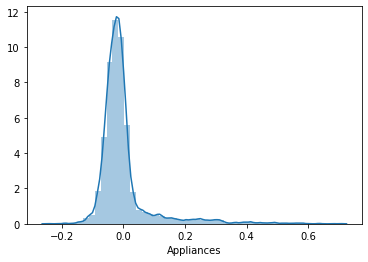

In [ ]:
sns.distplot(y_test - y_pred_ridge)

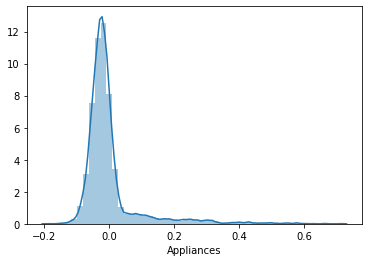

In [ ]:
sns.distplot(y_test - y_pred_lasso)

ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
elastic = ElasticNet()
parameters = {'alpha':[1e-10,1e-8,1e-6,1e-4,0.001,0.01,0.1,1,2,5,10,15,20,30,50,100,200]}

elastic_reg = RandomizedSearchCV(elastic,parameters,cv= 10)
elastic_reg.fit(x_train, y_train)
y_pred_elastic = elastic_reg.predict(x_test)
print(y_pred_elastic)

print(elastic_reg.best_estimator_)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.393717044915313, tolerance: 0.011222605291240138
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.608939450052628, tolerance: 0.011562069860231814
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.95659359307925, tolerance: 0.011418106771954817
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2

[0.03322149 0.2441157  0.03399982 ... 0.06844547 0.10032216 0.05722295]
ElasticNet(alpha=1e-08, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.37106766777482, tolerance: 0.012789690932435113
  positive)


In [ ]:
print(elastic_reg.best_params_)
print(elastic_reg.best_score_)

{'alpha': 1e-08}
0.1402203761464029


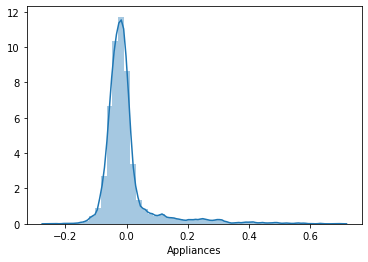

In [ ]:
sns.distplot(y_test - y_pred_elastic)

Setting the best model

In [ ]:
best_model1 = elastic_reg.best_estimator_
print(best_model1.coef_)

# best_model2 = lasso_reg.best_estimator_
# print(best_model2.coef_)

# best_model3 = ridge_reg.best_estimator_
# print(best_model3.coef_)

[-3.29281976e-03  5.53531383e-01 -2.36147629e-01 -4.56661800e-01
  2.90623952e-01  9.60434797e-02  2.89779473e-02  2.63829152e-02
 -1.56622709e-02  1.60060847e-02  2.36386868e-01  3.80420848e-02
  1.03144200e-02 -4.46121640e-02  1.01993693e-01 -1.57597815e-01
 -1.89936482e-01 -3.98004653e-02 -3.21712300e-01  6.83900858e-03
 -7.76075824e-02  2.91853583e-02  1.23058337e-02  1.17669783e-01
  1.53999421e-03  9.05669526e-08]



Comparing the Effects of regularisation


In [ ]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  #weights = pd.Series(best_model.coef_, feat.columns).sort_values()
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

  
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight').round(3)
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
#elastic_weights_df = get_weights_df(elastic_reg, x_train, 'Elastic_weight').round(3)

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
#final_weights = pd.merge(final_weights, elastic_weights_df, on='Features')


In [ ]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.457,-0.411071,-0.000000
1,T_out,-0.322,-0.262172,0.000000
2,T2,-0.236,-0.201397,0.000000
3,T9,-0.190,-0.188916,-0.000000
4,RH_8,-0.158,-0.156830,-0.000110
5,RH_out,-0.078,-0.054724,-0.049557
6,RH_7,-0.045,-0.045977,-0.000000
7,RH_9,-0.040,-0.041367,-0.000000
8,T5,-0.016,-0.019853,-0.000000
9,T1,-0.003,-0.018406,0.000000


In [ ]:
from sklearn.metrics import r2_score
y_true = features_df['T2']
y_pred = features_df['T6']
r2_score(y_true, y_pred).round(2)

0.16